In [1]:
import pandas as  pd 
import matplotlib.pyplot as plt
import numpy as  np

In [3]:
df_all = pd.read_csv("brasil_final_2.csv")

# Hồi 1 — Brazil không phải là một thị trường, mà là nhiều thị trường

# Hồi 1 — Brazil không phải *một* thị trường, mà là *nhiều* thị trường

## 1) Tổng quan theo vùng (Region)
Biểu đồ **Number of Real Estate Listings by Region** cho thấy nguồn cung bất động sản tại Brazil **phân bổ rất không đồng đều** giữa các vùng.

- **Southeast** và **South** là hai vùng có số lượng listing áp đảo → đây là **core supply markets**.
- **Northeast** đứng sau, vẫn có quy mô đáng kể nhưng thấp hơn rõ rệt so với 2 vùng dẫn đầu.
- **Central-West** và đặc biệt **North** có số listing rất thấp → thể hiện **thị trường mỏng**, thanh khoản hạn chế.

**Kết luận:** Không thể xem “Brazil” như một thị trường đồng nhất. Quy mô và thanh khoản khác nhau mạnh theo vùng, nên chiến lược mở rộng phải bắt đầu từ các vùng có nguồn cung lớn.

---

## 2) Tổng quan theo bang (State) — Top 15
Biểu đồ **Top 15 States by Number of Listings** cho thấy nguồn cung tập trung vào một nhóm bang cụ thể.

- Các bang nổi bật trong nhóm đầu (ví dụ: **Rio Grande do Sul, Rio de Janeiro, São Paulo, Santa Catarina, Minas Gerais, Paraná**) chiếm số listing rất lớn → đây là các **entry points tự nhiên** cho giai đoạn đầu.
- Sau nhóm dẫn đầu, số listing giảm khá nhanh (đuôi dài) → nhiều bang khác có **thanh khoản thấp**, khó mở rộng đồng loạt.

**Kết luận:** Ngay cả trong các vùng lớn, thị trường cũng **tập trung theo bang**. Quyết định “vào Brazil” cần được chuyển thành “vào bang nào trước”.

---

## 3) Drill-down: Region → State (cấu trúc phân mảnh theo địa lý)
Biểu đồ **Listings Distribution by Region within Top States** giúp xác định các bang top thuộc vùng nào, và củng cố luận điểm “Brazil phân mảnh mạnh”.

- Các bang top **không phân bố đều** trên toàn quốc mà tập trung mạnh vào:
  - **South** (ví dụ: Rio Grande do Sul, Paraná, Santa Catarina)
  - **Southeast** (ví dụ: São Paulo, Rio de Janeiro, Minas Gerais)
- Một số bang top thuộc **Northeast** (ví dụ: Bahia, Ceará, Pernambuco) nhưng quy mô vẫn thấp hơn cụm South/Southeast.
- **Central-West** xuất hiện ở mức trung bình (ví dụ: Distrito Federal, Goiás).
- **North** gần như vắng mặt trong nhóm top → dấu hiệu thị trường mỏng.

**Kết luận:** Dữ liệu phản ánh **sự phân mảnh địa lý rất mạnh**: nguồn cung tập trung chủ yếu ở một số bang/vùng nhất định, trong khi nhiều bang khác gần như không có “thanh khoản”.

---

## Ý nghĩa kinh doanh (Market Definition)
Từ các trực quan trên, có thể rút ra insight ở tầng chiến lược:

- Không thể “vào Brazil” một cách đồng loạt.
- Cần chọn **entry points** theo **vùng/bang ưu tiên** dựa trên:
  - quy mô nguồn cung (listing volume),
  - mức độ thanh khoản,
  - khả năng mở rộng vận hành và marketing theo cụm địa lý.

> Đây là bước **định nghĩa thị trường và chiến lược gia nhập**, *không phải* phân tích giá.


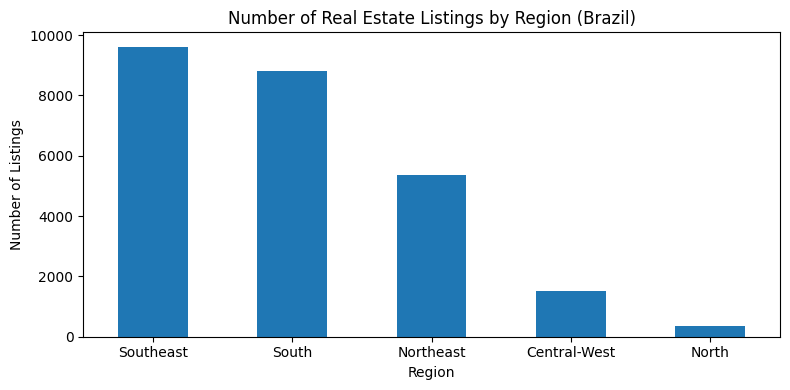

In [4]:
import matplotlib.pyplot as plt

region_counts = (
    df_all["region"]
    .value_counts()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 4))
region_counts.plot(kind="bar")
plt.title("Number of Real Estate Listings by Region (Brazil)")
plt.ylabel("Number of Listings")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


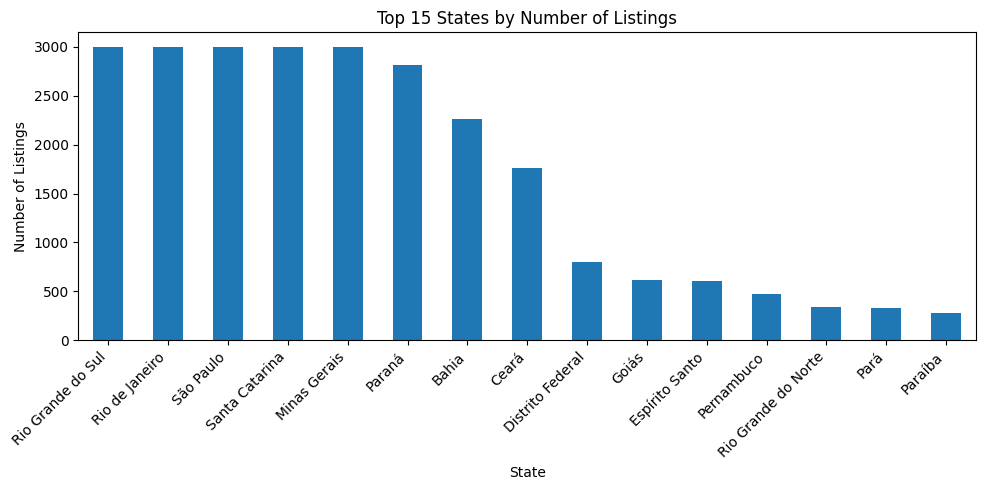

In [5]:
TOP_N = 15

state_counts = (
    df_all["state"]
    .value_counts()
    .head(TOP_N)
)

plt.figure(figsize=(10, 5))
state_counts.plot(kind="bar")
plt.title(f"Top {TOP_N} States by Number of Listings")
plt.ylabel("Number of Listings")
plt.xlabel("State")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

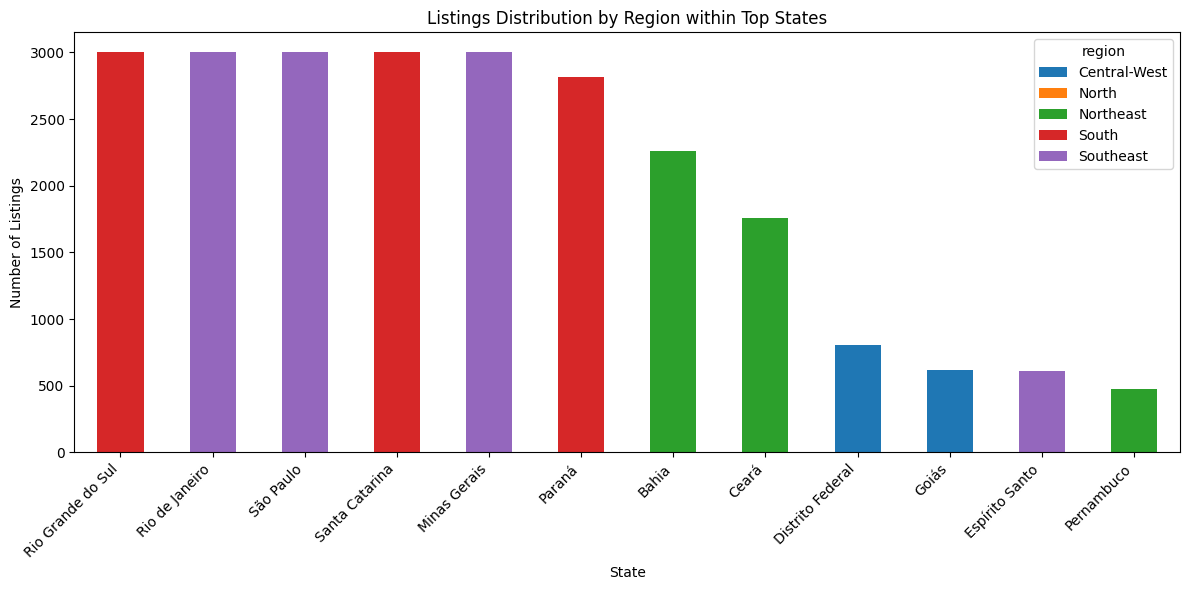

In [6]:
region_state = (
    df_all
    .groupby(["region", "state"])
    .size()
    .reset_index(name="count")
)

pivot_rs = region_state.pivot(
    index="state",
    columns="region",
    values="count"
).fillna(0)

pivot_rs.sum(axis=1).sort_values(ascending=False).head(12).index
top_states = pivot_rs.sum(axis=1).sort_values(ascending=False).head(12).index

plt.figure(figsize=(12, 6))
pivot_rs.loc[top_states].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

plt.title("Listings Distribution by Region within Top States")
plt.ylabel("Number of Listings")
plt.xlabel("State")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Mật độ listing theo bang (spatial density)

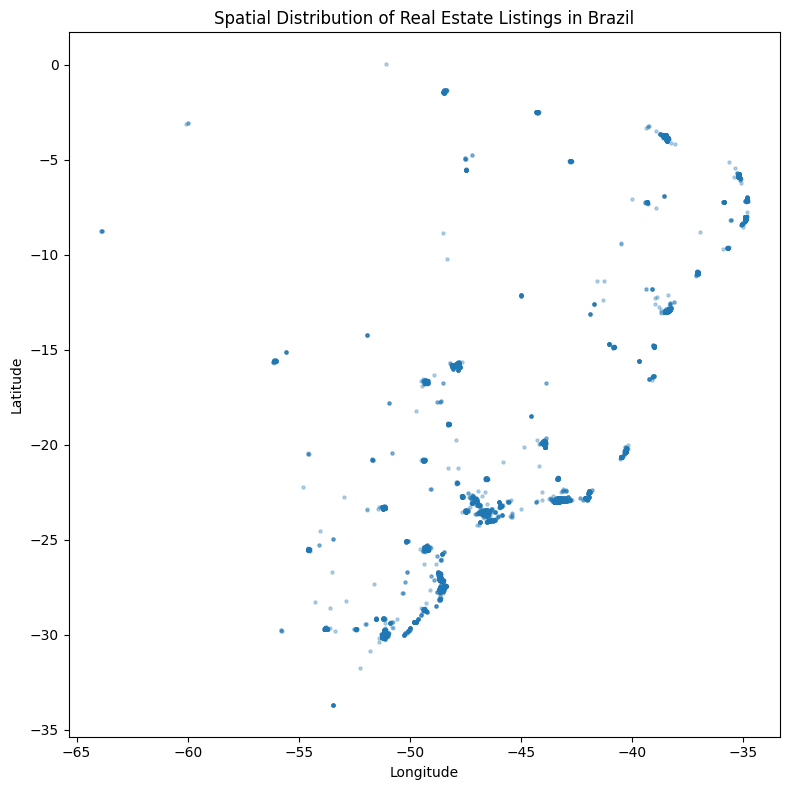

In [7]:
plt.figure(figsize=(8, 8))

plt.scatter(
    df_all["lon"],
    df_all["lat"],
    s=5,
    alpha=0.3
)

plt.title("Spatial Distribution of Real Estate Listings in Brazil")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


# Hồi 2 — Thanh khoản đi trước giá

# Hồi 2 — Thanh khoản đi trước giá: xác định điểm vào thị trường

## 1) Trực quan Liquidity vs Price per m²
Biểu đồ scatter **Liquidity vs Median Price per m² by State** đặt mỗi bang vào không gian hai chiều:

- **Trục X (Liquidity):** số lượng listing — đại diện cho mức độ thanh khoản thị trường  
- **Trục Y (Median price per m²):** mức giá trung vị — tránh bị méo bởi outlier  
- **Kích thước điểm:** tổng giá trị thị trường (proxy cho quy mô kinh tế)  
- **Đường gạch ngang/dọc:** ngưỡng median toàn bộ bang, chia thị trường thành 4 nhóm

Biểu đồ cho thấy **không tồn tại mối quan hệ tuyến tính đơn giản giữa giá và thanh khoản**. Có bang giá cao nhưng thanh khoản thấp, và ngược lại có bang giá vừa phải nhưng thanh khoản rất cao.

---

## 2) Phân loại thị trường theo 4 nhóm chiến lược

Dựa trên hai tiêu chí **liquidity** và **median price**, các bang được phân loại như sau:

### 2.1. High liquidity – High price (Mature / Competitive)
Đặc trưng:
- Thanh khoản cao
- Giá/m² cao
- Tổng giá trị thị trường lớn

Ví dụ tiêu biểu:
- **Minas Gerais**
- **Paraná**
- **Bahia**
- **Ceará**
- **Distrito Federal**
- **Goiás**
- **Espírito Santo**
- **Pará**

👉 Đây là các **thị trường trưởng thành**, cạnh tranh cao, phù hợp cho:
- doanh nghiệp đã có kinh nghiệm vận hành,
- chiến lược premium hoặc scale lớn.

---

### 2.2. High liquidity – Mid price (Best Entry)
Đặc trưng:
- Thanh khoản cao
- Giá trung vị vừa phải
- Quy mô thị trường lớn nhưng chưa quá “đắt”

Ví dụ tiêu biểu:
- **São Paulo**
- **Rio Grande do Sul**
- **Rio de Janeiro**
- **Santa Catarina**
- **Pernambuco**

👉 Đây là **điểm vào thị trường lý tưởng** cho giai đoạn đầu:
- dễ tìm giao dịch,
- dễ test sản phẩm và pricing,
- rủi ro thấp hơn so với nhóm Mature / Competitive.

---

### 2.3. Low liquidity – High price (Niche / Risky)
Đặc trưng:
- Giá/m² cao
- Thanh khoản thấp
- Quy mô thị trường nhỏ

Ví dụ:
- **Paraíba**
- **Maranhão**
- **Mato Grosso**
- **Alagoas**
- **Amapá**

👉 Nhóm này mang tính **ngách hoặc đầu cơ**:
- có thể hấp dẫn về giá,
- nhưng rủi ro cao do thiếu giao dịch,
- không phù hợp làm entry point diện rộng.

---

### 2.4. Low liquidity – Low price (Not Ready)
Đặc trưng:
- Giá thấp
- Thanh khoản thấp
- Tổng giá trị thị trường rất nhỏ

Ví dụ:
- **Rio Grande do Norte**
- **Sergipe**
- **Piauí**
- **Mato Grosso do Sul**
- **Rondônia**
- **Amazonas**
- **Tocantins**

👉 Đây là các thị trường **chưa sẵn sàng để mở rộng**, trừ khi có chiến lược rất đặc thù hoặc dữ liệu bổ sung khác.

---

## 3) Insight cốt lõi (Decision-making Layer)

- **Giá cao không đồng nghĩa với thị trường tốt.**
- **Thanh khoản là điều kiện tiên quyết** để mở rộng: có giao dịch thì mới có học hỏi, tối ưu và scale.
- Các bang thuộc nhóm **High liquidity – Mid price** là lựa chọn tối ưu cho giai đoạn đầu, vì cân bằng được:
  - quy mô,
  - rủi ro,
  - khả năng kiểm soát chi phí.

> Nói cách khác: *Thanh khoản đi trước giá.*

---

## 4) Ý nghĩa chiến lược cho mở rộng thị trường

Từ Hồi 2, doanh nghiệp có thể:
- Xác định **thứ tự ưu tiên các bang** khi gia nhập Brazil.
- Tránh bẫy “giá cao = cơ hội tốt”.
- Thiết kế chiến lược khác nhau cho:
  - thị trường trưởng thành (defensive / competitive),
  - thị trường entry (growth-oriented),
  - thị trường ngách (opportunistic),
  - thị trường chưa sẵn sàng (wait & observe).

👉 Đây là **tầng ra quyết định chiến lược**, vượt xa EDA mô tả, và là nền tảng cho các bước tiếp theo về cấu trúc thị trường và định vị sản phẩm.


In [9]:
df_all = df_all.copy()

df_all["price_per_m2"] = df_all["price_brl"] / df_all["area_m2"]
state_market = (
    df_all
    .dropna(subset=["state", "price_per_m2"])
    .groupby("state")
    .agg(
        listings=("price_per_m2", "count"),
        median_price_per_m2=("price_per_m2", "median"),
        total_market_value=("price_brl", "sum")
    )
    .reset_index()
)
liq_threshold = state_market["listings"].median()
price_threshold = state_market["median_price_per_m2"].median()


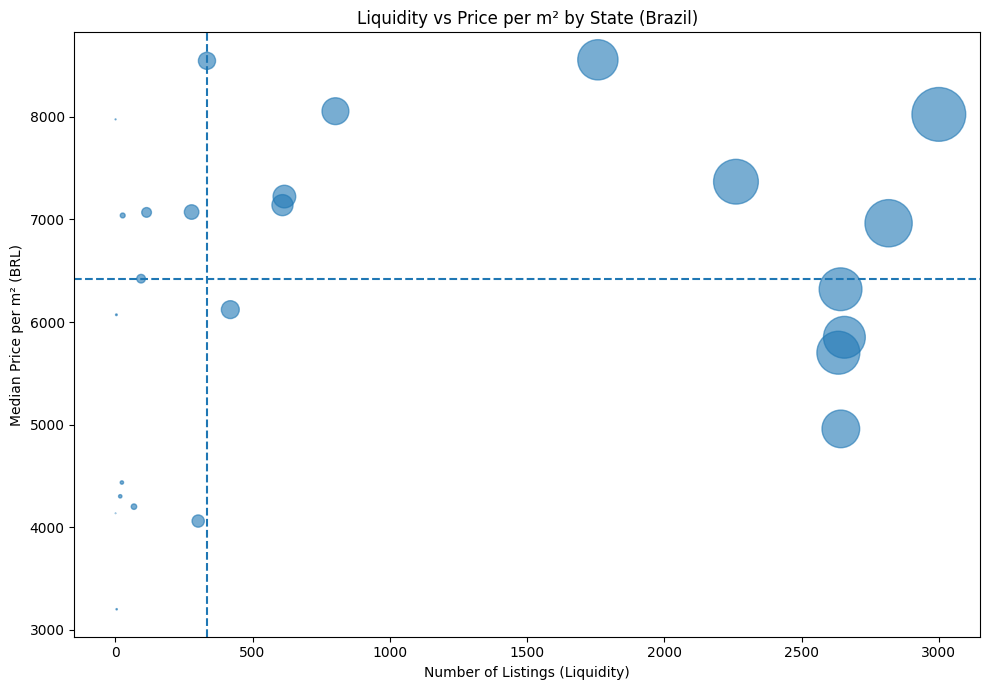

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

sizes = state_market["total_market_value"] / state_market["total_market_value"].max() * 1500

plt.scatter(
    state_market["listings"],
    state_market["median_price_per_m2"],
    s=sizes,
    alpha=0.6
)

# Vẽ đường phân chia
plt.axvline(liq_threshold, linestyle="--")
plt.axhline(price_threshold, linestyle="--")

plt.xlabel("Number of Listings (Liquidity)")
plt.ylabel("Median Price per m² (BRL)")
plt.title("Liquidity vs Price per m² by State (Brazil)")

plt.tight_layout()
plt.show()


In [11]:
def classify_market(row):
    if row["listings"] >= liq_threshold and row["median_price_per_m2"] >= price_threshold:
        return "High liquidity – High price (Mature / Competitive)"
    elif row["listings"] >= liq_threshold and row["median_price_per_m2"] < price_threshold:
        return "High liquidity – Mid price (Best Entry)"
    elif row["listings"] < liq_threshold and row["median_price_per_m2"] >= price_threshold:
        return "Low liquidity – High price (Niche / Risky)"
    else:
        return "Low liquidity – Low price (Not Ready)"

state_market["market_type"] = state_market.apply(classify_market, axis=1)


In [12]:
state_market.sort_values(
    ["market_type", "listings"],
    ascending=[True, False]
)


,state,listings,median_price_per_m2,total_market_value,market_type
11,Minas Gerais,3000,8024.179286,2.999424e+09,High liquidity – High price (Mature / Competit...
12,Paraná,2817,6962.938060,2.315258e+09,High liquidity – High price (Mature / Competit...
3,Bahia,2261,7367.880833,2.077977e+09,High liquidity – High price (Mature / Competit...
4,Ceará,1758,8556.369400,1.680882e+09,High liquidity – High price (Mature / Competit...
5,Distrito Federal,802,8055.405687,7.478178e+08,High liquidity – High price (Mature / Competit...
7,Goiás,616,7222.908680,5.321189e+08,High liquidity – High price (Mature / Competit...
6,Espírito Santo,609,7139.400000,4.612218e+08,High liquidity – High price (Mature / Competit...
14,Pará,334,8546.440374,3.047543e+08,High liquidity – High price (Mature / Competit...
23,São Paulo,2656,5850.929113,1.812328e+09,High liquidity – Mid price (Best Entry)
18,Rio Grande do Sul,2643,4957.833929,1.471224e+09,High liquidity – Mid price (Best Entry)


# Hồi 3 — Cấu trúc thị trường quan trọng hơn mức giá trung bình

# Hồi 3 — Cấu trúc thị trường quan trọng hơn mức giá trung bình

## 1) Giá trung bình che giấu sự thật

Các biểu đồ boxplot **Price per m² by Property Type** và **Price per m² Distribution by State** cho thấy một thực tế quan trọng:  
**giá trung bình không phản ánh đầy đủ cấu trúc thị trường**.

- Phân phối giá có **đuôi dài và nhiều outlier**, đặc biệt ở phân khúc căn hộ (apartment).
- Cùng một bang, giá có thể dao động rất rộng → thị trường **phân hóa mạnh theo loại hình và vị trí**.
- Việc chỉ nhìn vào “average price” sẽ **đánh mất insight về sản phẩm và phân khúc**.

---

## 2) Apartment vs House: Premium không đồng đều theo bang

Biểu đồ **Apartment vs House Price Premium by State** và bảng số liệu cho thấy:

- Ở nhiều bang, **căn hộ có giá/m² cao hơn nhà từ 1.5–2 lần**.
- Tuy nhiên, mức premium **không đồng nhất** giữa các bang.

### Các bang có premium rất cao (Apartment ≫ House)
Ví dụ:
- **Pará (~2.07x)**
- **Maranhão (~2.00x)**
- **Goiás (~1.83x)**
- **Distrito Federal (~1.82x)**
- **Ceará (~1.82x)**

👉 Đây là dấu hiệu của:
- mức độ đô thị hóa cao ở một số khu vực,
- nhu cầu mạnh đối với căn hộ (đầu tư, cho thuê, đô thị trung tâm),
- cấu trúc thị trường **đã phân hóa rõ rệt**.

---

### Các bang có premium trung bình (1.4–1.6x)
Ví dụ:
- **São Paulo**
- **Paraná**
- **Santa Catarina**
- **Rio de Janeiro**
- **Bahia**

👉 Đây là các thị trường:
- đã phát triển,
- có nhiều phân khúc song song (apartment & house),
- phù hợp cho chiến lược đa sản phẩm.

---

### Các bang có premium thấp (≈1.0–1.2x)
Ví dụ:
- **Minas Gerais**
- **Pernambuco**

👉 Thể hiện:
- thị trường **chưa phân hóa mạnh**,
- house và apartment cạnh tranh gần như ngang nhau,
- cấu trúc sản phẩm còn “phẳng”.

---

## 3) Insight chiến lược: Cấu trúc > Giá

Từ Hồi 3, có thể rút ra các insight có giá trị hành động cao:

- **Giá cao không tự thân tạo ra giá trị thị trường.**
- Điều quyết định là:
  - bạn bán **loại sản phẩm nào** (apartment hay house),
  - ở **bang nào**,
  - trong **cấu trúc đô thị ra sao**.

Cùng một mức giá/m² trung bình:
- bang A có apartment premium 2x → thị trường đô thị, nhà đầu tư, khách hàng khác hẳn,
- bang B có premium ~1x → thị trường chưa phân hóa, chiến lược giá phải khác.

---

## 4) Ý nghĩa cho định vị sản phẩm & pricing

Từ phân tích cấu trúc:

- **Product strategy**  
  → Bang có apartment premium cao: tập trung căn hộ, unit nhỏ, thanh khoản nhanh.  
  → Bang premium thấp: house vẫn là sản phẩm chủ đạo.

- **Customer targeting**  
  → Premium cao: nhà đầu tư, người trẻ đô thị, cho thuê.  
  → Premium thấp: hộ gia đình, nhu cầu ở thực.

- **Pricing & positioning**  
  → Không thể dùng một khung giá chung cho toàn Brazil.  
  → Giá phải gắn với **cấu trúc thị trường địa phương**.

> **Kết luận Hồi 3:**  
> Không phải “giá bao nhiêu” quyết định chiến lược, mà là **thị trường được cấu trúc như thế nào**.

---

👉 Hồi tiếp theo (nếu bạn làm):  
**“Định vị cơ hội: đâu là đắt, đâu là chưa được khai thác”**  
→ bước chuyển từ *chiến lược* sang *monetization & hành động*.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df_plot = (
    df_all
    .dropna(subset=["price_per_m2", "property_type", "state"])
)

# Optional: cắt outlier cực đoan (1% – 99%)
low, high = df_plot["price_per_m2"].quantile([0.01, 0.99])
df_plot = df_plot[
    (df_plot["price_per_m2"] >= low) &
    (df_plot["price_per_m2"] <= high)
]


<Figure size 600x500 with 0 Axes>

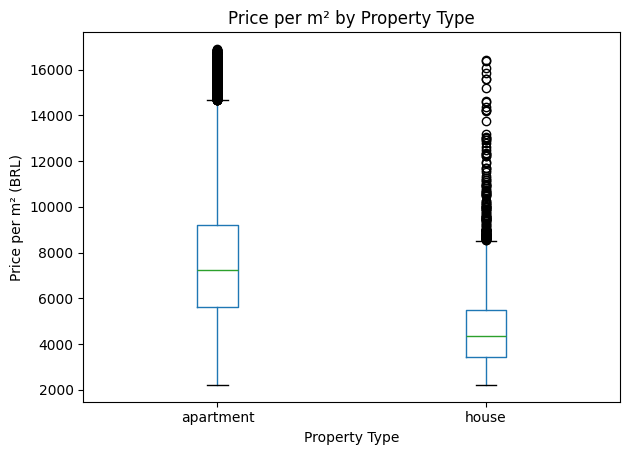

In [14]:
plt.figure(figsize=(6, 5))

df_plot.boxplot(
    column="price_per_m2",
    by="property_type",
    grid=False
)

plt.title("Price per m² by Property Type")
plt.suptitle("")
plt.ylabel("Price per m² (BRL)")
plt.xlabel("Property Type")
plt.tight_layout()
plt.show()


In [15]:
MIN_LISTINGS = 50

valid_states = (
    df_plot["state"]
    .value_counts()
    .loc[lambda x: x >= MIN_LISTINGS]
    .index
)

df_state_plot = df_plot[df_plot["state"].isin(valid_states)]


<Figure size 1200x600 with 0 Axes>

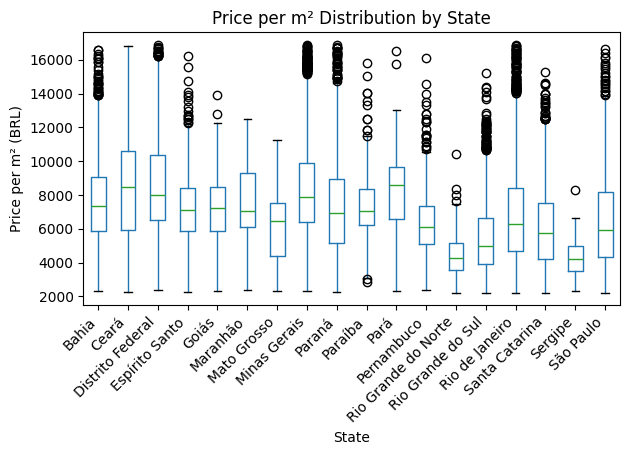

In [16]:
plt.figure(figsize=(12, 6))

df_state_plot.boxplot(
    column="price_per_m2",
    by="state",
    grid=False
)

plt.title("Price per m² Distribution by State")
plt.suptitle("")
plt.ylabel("Price per m² (BRL)")
plt.xlabel("State")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [17]:
state_type_price = (
    df_state_plot
    .groupby(["state", "property_type"])
    .agg(median_price_per_m2=("price_per_m2", "median"))
    .reset_index()
)


In [18]:
pivot_price = state_type_price.pivot(
    index="state",
    columns="property_type",
    values="median_price_per_m2"
)

pivot_price["apartment_house_ratio"] = (
    pivot_price["apartment"] / pivot_price["house"]
)


In [19]:
pivot_price = pivot_price.sort_values(
    "apartment_house_ratio",
    ascending=False
)

pivot_price


property_type,apartment,house,apartment_house_ratio
state,,,
Pará,9048.376429,4368.719750,2.071173
Maranhão,7739.134943,3875.546875,1.996914
Goiás,7418.162150,4058.185357,1.827951
Distrito Federal,8773.238710,4823.794854,1.818742
Ceará,9500.478478,5225.080799,1.818245
São Paulo,6835.662121,3992.510696,1.712121
Paraná,7878.510101,4629.048504,1.701972
Santa Catarina,6262.825549,3699.348001,1.692954
Rio de Janeiro,6998.315119,4325.219800,1.618025


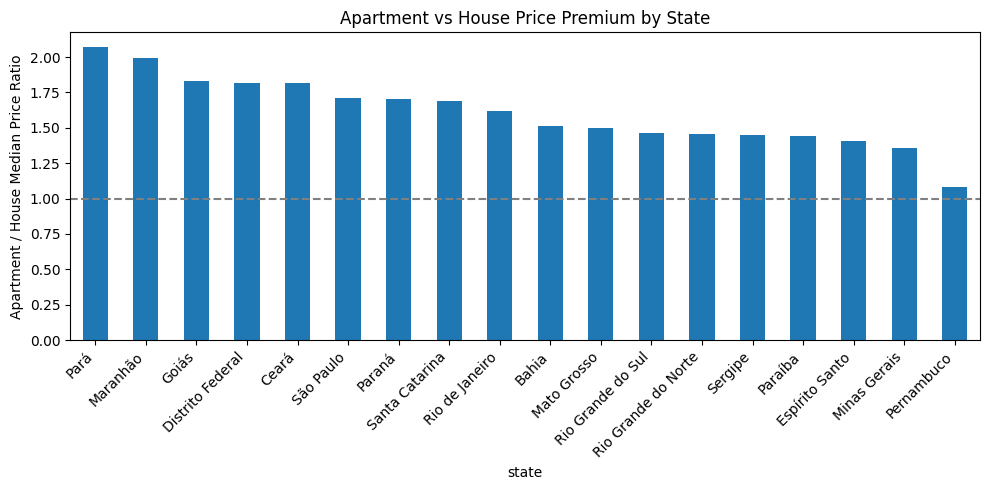

In [20]:
plt.figure(figsize=(10, 5))

pivot_price["apartment_house_ratio"].plot(kind="bar")

plt.axhline(1.0, linestyle="--", color="gray")
plt.ylabel("Apartment / House Median Price Ratio")
plt.title("Apartment vs House Price Premium by State")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Hồi 4 — Định vị cơ hội: đâu là “đắt”, đâu là “chưa được khai thác”

# Hồi 4 — Định vị cơ hội: đâu là “đắt”, đâu là “chưa được khai thác”

## 1) Phân phối giá: thị trường không đối xứng

Hai biểu đồ **Histogram** và **Density của price per m² (BRL)** cho thấy phân phối giá bất động sản tại Brazil có đặc điểm:

- Phân phối **lệch phải (right-skewed)** rõ rệt.
- Phần lớn listing tập trung quanh một vùng giá trung tâm.
- Đuôi phải dài thể hiện **các khu vực giá rất cao** nhưng số lượng không nhiều.

Việc đánh dấu:
- **Bottom 20%** (giá thấp)
- **Top 10%** (giá cao)

giúp chia thị trường thành các vùng có ý nghĩa kinh doanh rõ ràng, thay vì nhìn giá trung bình chung.

---

## 2) Giá cao và giá thấp không phân bố ngẫu nhiên trong không gian

Biểu đồ **Premium Pockets vs Value Zones** cho thấy:

- Trong **cùng một bang**, các listing giá cao và giá thấp **không trộn lẫn ngẫu nhiên**.
- Chúng tạo thành **các cụm không gian (spatial clusters)**:
  - *Premium pockets*: giá cao vượt benchmark địa phương.
  - *Value zones*: giá thấp hơn đáng kể so với benchmark.

👉 Điều này khẳng định:
> Cơ hội không nằm ở cấp bang, mà nằm ở **cấp vi mô theo vị trí**.

---

## 3) Deal intensity map: trực quan hoá “độ hấp dẫn đầu tư”

Biểu đồ **Deal Intensity Map** (hexbin) tổng hợp **median deal_score theo từng ô không gian** cho thấy:

- Có những vùng liên tục xuất hiện **deal_score dương cao**  
  → khu vực đang bị **định giá thấp so với mặt bằng**.
- Ngược lại, các vùng deal_score âm sâu phản ánh **premium pockets** — nơi thị trường đã “đắt”.

Cách tiếp cận này:
- Giảm nhiễu từng listing lẻ.
- Nâng phân tích lên **mức khu vực (zone-level)** — đúng với cách nhà đầu tư và môi giới nhìn thị trường.

---

## 4) Deal_score: biến dữ liệu thành công cụ kiếm tiền

Bảng top listing theo **deal_score** cho thấy các bất động sản:

- Có **price_per_m2 thấp hơn benchmark từ 60–75%**.
- Nhiều listing tập trung ở các bang như:
  - Ceará
  - Minas Gerais
  - Bahia
  - São Paulo

### Định nghĩa deal_score
> **deal_score (%) = (benchmark − giá thực tế) / benchmark**

Ý nghĩa:
- Deal_score càng cao → listing càng “rẻ” so với mặt bằng thị trường cùng bang & loại hình.

---

## 5) Insight có thể hành động ngay (Monetization Layer)

Từ Hồi 4, dữ liệu đã được chuyển hoá thành **công cụ ra tiền**:

### Ứng dụng thực tế
- **Đầu tư**  
  → Lọc nhanh các listing bị định giá thấp trong cùng một thị trường quen thuộc.
- **Lead cho môi giới**  
  → Ưu tiên liên hệ các chủ nhà có deal_score cao.
- **Định giá nhanh**  
  → So sánh một listing mới với benchmark địa phương để ra giá đề xuất.

---

## 6) Câu chuyện hoàn chỉnh của Hồi 4

> “Trong cùng một bang, tồn tại những khu vực đã bị đẩy giá lên rất cao, đồng thời cũng tồn tại những vùng đang bị định giá thấp so với mặt bằng.  
> Bằng cách chuẩn hoá giá theo cấu trúc thị trường địa phương và chuyển hoá thành deal_score, dữ liệu không chỉ mô tả thị trường mà còn trực tiếp chỉ ra **cơ hội có thể khai thác**.”

---

## Kết luận Hồi 4
- Giá trung bình **không đủ** để tìm cơ hội.
- Cơ hội nằm ở **sự lệch chuẩn so với benchmark**.
- Đây là bước chuyển từ **phân tích chiến lược** sang **monetization & hành động**.

👉 Ở mức độ này, dataset không còn là dữ liệu mô tả, mà đã trở thành **engine tạo quyết định kinh doanh**.


In [21]:
df_m = df_all.copy()

df_m["price_per_m2"] = df_m["price_brl"] / df_m["area_m2"]

# Giữ các điểm hợp lệ
df_m = df_m.dropna(subset=["price_per_m2", "lat", "lon", "state", "property_type"])
df_m = df_m[df_m["price_per_m2"] > 0]

# Cắt outlier cực đoan để histogram/density dễ đọc
p01, p99 = df_m["price_per_m2"].quantile([0.01, 0.99])
df_m = df_m[(df_m["price_per_m2"] >= p01) & (df_m["price_per_m2"] <= p99)]

In [22]:
q80 = df_m["price_per_m2"].quantile(0.80)  # bottom 80% cutoff (=> bottom 20% nằm dưới q20)
q20 = df_m["price_per_m2"].quantile(0.20)
q90 = df_m["price_per_m2"].quantile(0.90)  # top 10%


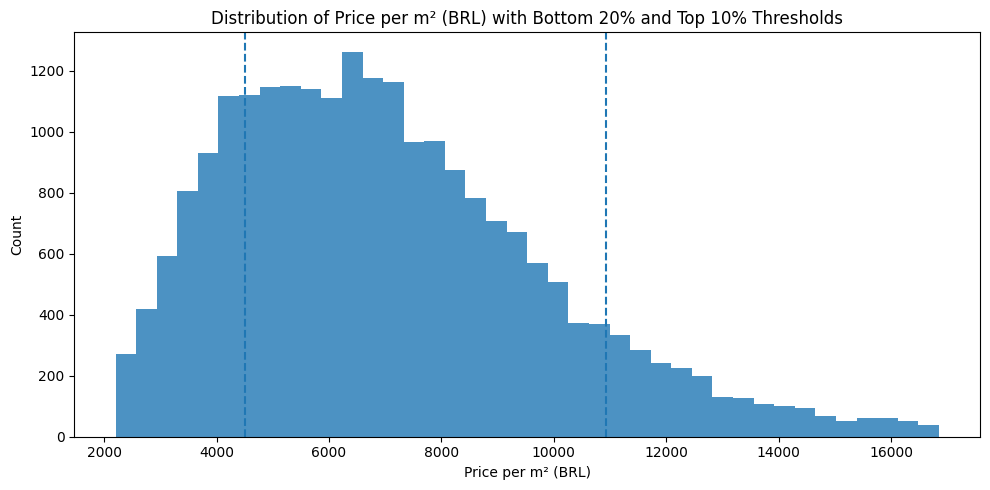

In [23]:
plt.figure(figsize=(10, 5))

plt.hist(df_m["price_per_m2"], bins=40, alpha=0.8)

plt.axvline(q20, linestyle="--")
plt.axvline(q90, linestyle="--")

plt.title("Distribution of Price per m² (BRL) with Bottom 20% and Top 10% Thresholds")
plt.xlabel("Price per m² (BRL)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


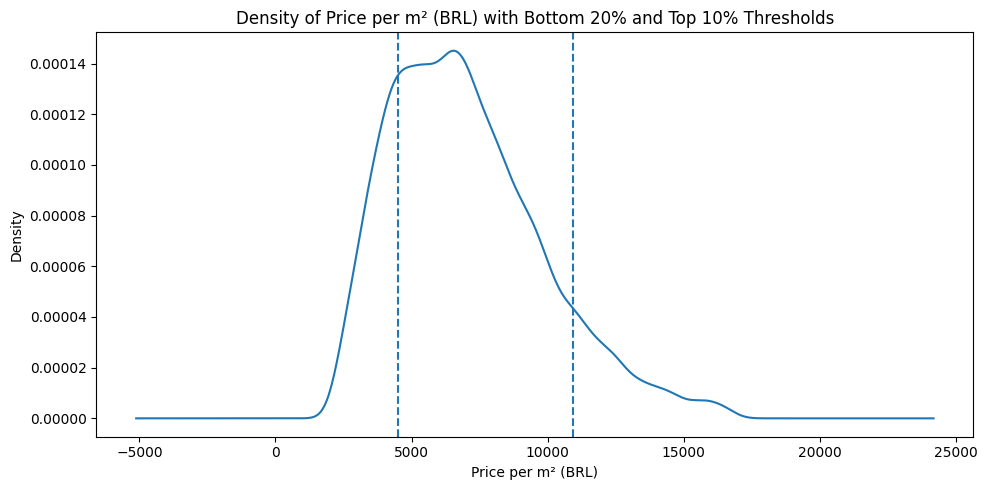

In [24]:
plt.figure(figsize=(10, 5))

df_m["price_per_m2"].plot(kind="kde")
plt.axvline(q20, linestyle="--")
plt.axvline(q90, linestyle="--")

plt.title("Density of Price per m² (BRL) with Bottom 20% and Top 10% Thresholds")
plt.xlabel("Price per m² (BRL)")
plt.tight_layout()
plt.show()


In [25]:
benchmark = (
    df_m
    .groupby(["state", "property_type"])["price_per_m2"]
    .median()
    .rename("benchmark_median_price_per_m2")
    .reset_index()
)

df_m = df_m.merge(benchmark, on=["state", "property_type"], how="left")


In [26]:
df_m["deal_score"] = (
    (df_m["benchmark_median_price_per_m2"] - df_m["price_per_m2"])
    / df_m["benchmark_median_price_per_m2"]
) * 100


In [27]:
value_cut = df_m["deal_score"].quantile(0.80)    # top 20% deal tốt
premium_cut = df_m["deal_score"].quantile(0.20)  # bottom 20% (đắt/premium)


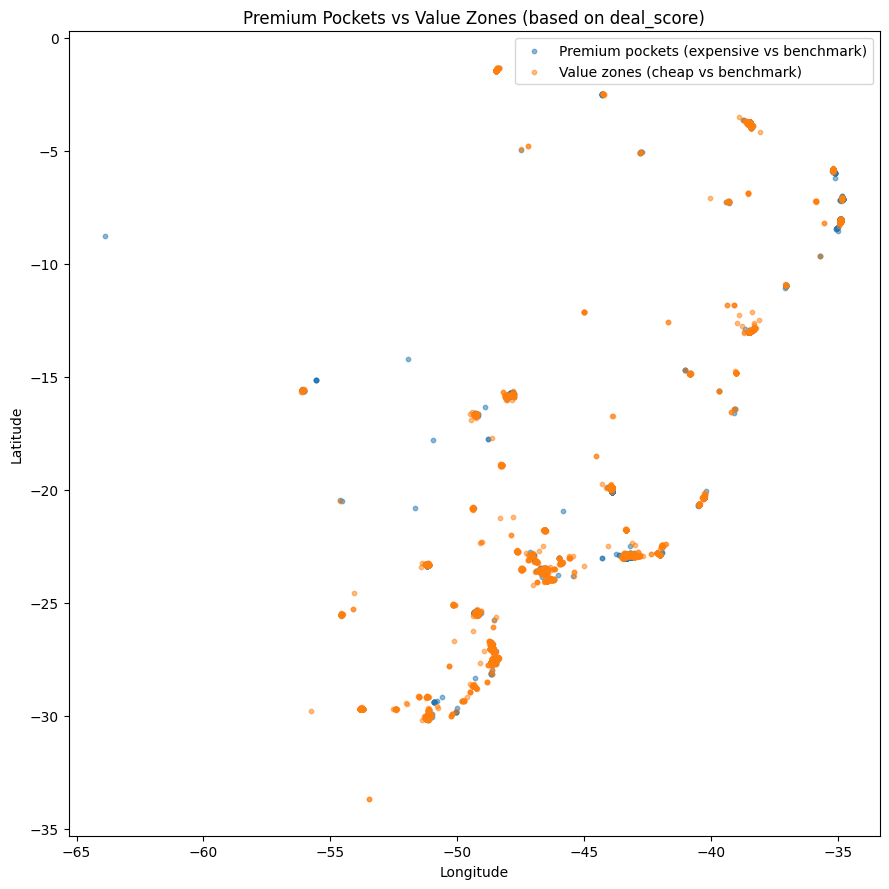

In [28]:
value = df_m[df_m["deal_score"] >= value_cut]
premium = df_m[df_m["deal_score"] <= premium_cut]

plt.figure(figsize=(9, 9))

plt.scatter(premium["lon"], premium["lat"], s=10, alpha=0.5, label="Premium pockets (expensive vs benchmark)")
plt.scatter(value["lon"], value["lat"], s=10, alpha=0.5, label="Value zones (cheap vs benchmark)")

plt.title("Premium Pockets vs Value Zones (based on deal_score)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()


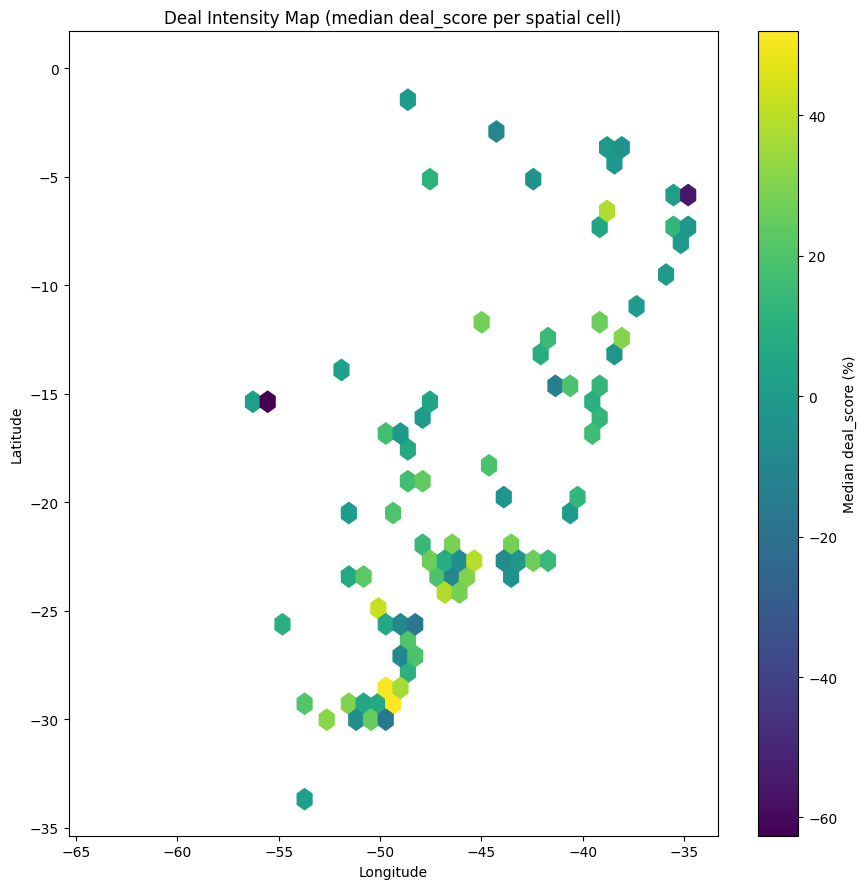

In [29]:
plt.figure(figsize=(9, 9))

hb = plt.hexbin(
    df_m["lon"],
    df_m["lat"],
    C=df_m["deal_score"],
    reduce_C_function=np.median,   # median deal_score trong mỗi ô
    gridsize=40,
    mincnt=5
)

plt.colorbar(hb, label="Median deal_score (%)")
plt.title("Deal Intensity Map (median deal_score per spatial cell)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


In [30]:
cols_show = [
    "state", "property_type", "area_m2", "price_brl",
    "price_per_m2", "benchmark_median_price_per_m2",
    "deal_score", "lat", "lon"
]

top_deals = df_m.sort_values("deal_score", ascending=False).head(20)[cols_show]
top_deals


,state,property_type,area_m2,price_brl,price_per_m2,benchmark_median_price_per_m2,deal_score,lat,lon
2672,Ceará,apartment,203.0,460275.85,2267.368719,9513.446208,76.166694,-3.711628,-38.554089
2542,Ceará,apartment,167.0,390064.25,2335.714072,9513.446208,75.448286,-3.726034,-38.560387
3407,Ceará,apartment,238.0,655307.95,2753.394748,9513.446208,71.057862,-3.739861,-38.458830
6573,Minas Gerais,apartment,240.0,616301.55,2567.923125,8061.328333,68.145161,-19.934652,-43.932949
3164,Ceará,apartment,127.0,390064.25,3071.372047,9513.446208,67.715463,-3.726333,-38.463623
19981,São Paulo,apartment,110.0,244541.25,2223.102273,6835.662121,67.477879,-23.540281,-46.512424
4329,Espírito Santo,apartment,184.0,436871.95,2374.304076,7263.265517,67.310791,-20.319680,-40.343445
3414,Ceará,apartment,165.0,514884.85,3120.514242,9513.446208,67.198908,-3.733789,-38.498131
3553,Ceará,apartment,128.0,405666.85,3169.272266,9513.446208,66.686391,-3.752629,-38.496282
5871,Minas Gerais,apartment,139.0,378763.95,2724.920504,8061.328333,66.197624,-21.801593,-46.574660
